In [1]:
import sys
sys.path.append('/Users/JIC115/Desktop/HEseg_prj/hovernet_modeling/final_v2/scripts')

from hv_util.util_eval_prep import * 

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.preprocessing import label_binarize

import pandas as pd 
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

wd1 = Path('/Users/JIC115/Desktop/HEseg_prj/HNSCC_PDO_model/PDO_large_tile_model/qprj_pred_all_PDO_wsi/')
wd2 = Path('/Users/JIC115/Desktop/qprj_PDO_remove_train_cell/')
wd_fig = Path('/Users/JIC115/Desktop/')

# Remove training cells 

30247
['tumor' 'normal']
['tumor' 'normal']


,normal,tumor,accuracy,macro avg,weighted avg
precision,0.985713,0.689163,0.841557,0.837438,0.884189
sensitivity,0.770240,0.978555,0.841557,0.874398,0.841557
f1-score,0.864757,0.808750,0.841557,0.836753,0.845583
support,19886.000000,10352.000000,0.841557,30238.000000,30238.000000


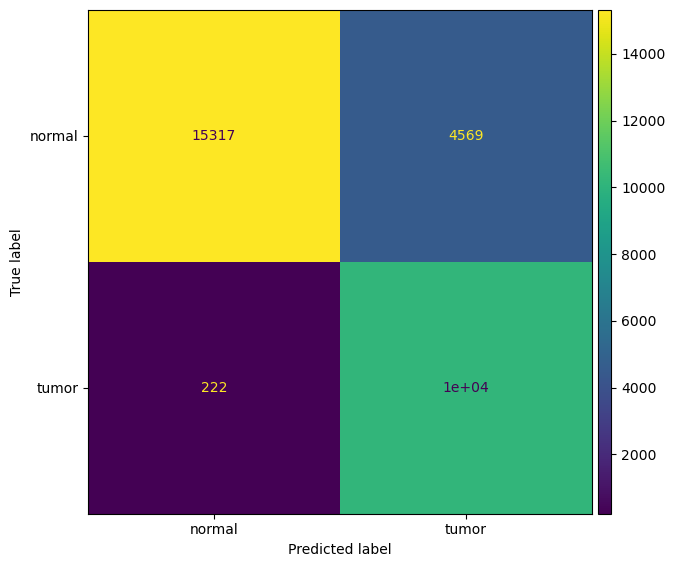

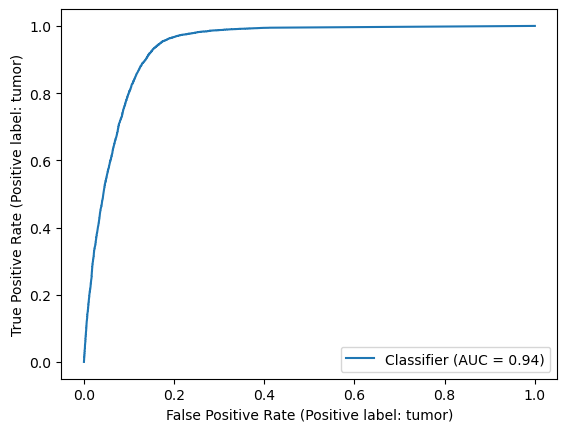

In [11]:
tbl_fn = wd1.joinpath('pred_sunny_tables/Cell-level_train_pure.csv')
df = pd.read_csv(str(tbl_fn))
print(len(df))

# remove background
df = df.query("pred_type != 'background' and true_type != 'background'")
print(df.pred_type.unique())
print(df.true_type.unique())

####### make plots
ytrue = df.true_type 
ypred = df.pred_type

#-------- confusion plot
conf_mat = confusion_matrix(ytrue, ypred) # sorted by alphabeta order of labels !!!
label = sorted(['normal','tumor']) 
cmat_disp = ConfusionMatrixDisplay(conf_mat,display_labels=label)

# customize :
fig, ax = plt.subplots(figsize=(6.5,6.6))    # set plot figsize
cmat_disp.plot(ax=ax, colorbar=False)    # Deactivate default colorbar,size does not match with plot

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cmat_disp.im_,  cax=cax)
plt.savefig(wd_fig.joinpath('Cell-level_train_pure_conf.pdf'))

#-------- ROC plot
yprob = df.prob_tumor
RocCurveDisplay.from_predictions(ytrue,yprob,pos_label='tumor')
plt.savefig(wd_fig.joinpath('Cell-level_train_pure_roc.pdf'))

#-------- report table
report = pd.DataFrame(classification_report(ytrue, ypred, output_dict = True))
report.rename(index = {'recall':'sensitivity'},inplace=True)
report
# plt.savefig(wd_fig.joinpath('Cell-level_train_pure_report.pdf'))

# Remove PDOs whose cells in training tiles

479


,normal,tumor,accuracy,macro avg,weighted avg
precision,0.995885,0.868644,0.933194,0.932264,0.941163
sensitivity,0.886447,0.995146,0.933194,0.940796,0.933194
f1-score,0.937984,0.927602,0.933194,0.932793,0.933519
support,273.000000,206.000000,0.933194,479.000000,479.000000


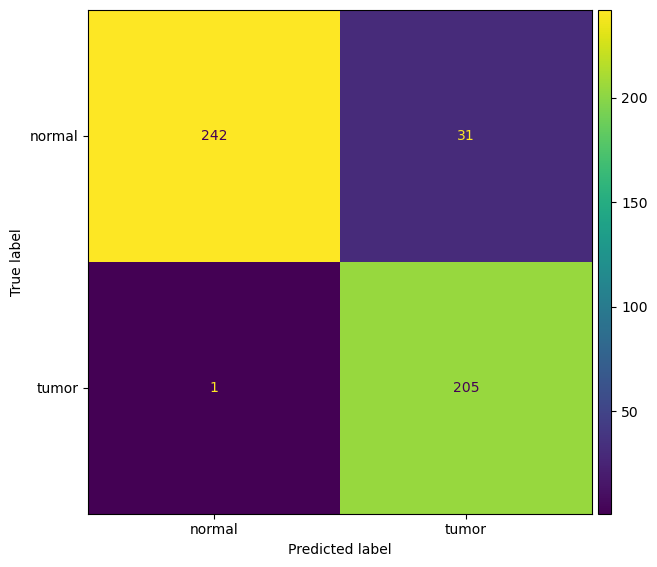

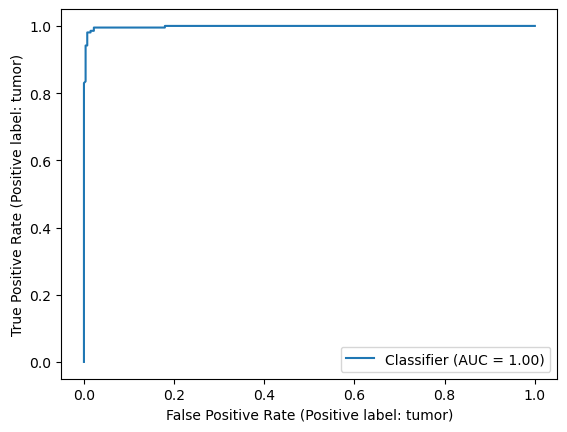

In [10]:
### get report
tbl_fn = wd1.joinpath('pred_sunny_tables/PDO-level_train_pure.csv')
df = pd.read_csv(str(tbl_fn),index_col=0)
print(len(df)) # 
ytrue = df['ann_ori_type']
ypred = df['ann_pred_type']

#-------- confusion plot
conf_mat = confusion_matrix(ytrue, ypred) # sorted by alphabeta order of labels !!!
label = sorted(['normal','tumor']) 
cmat_disp = ConfusionMatrixDisplay(conf_mat,display_labels=label)

# customize :
fig, ax = plt.subplots(figsize=(6.5,6.6))    # set plot figsize
cmat_disp.plot(ax=ax, colorbar=False)    # Deactivate default colorbar,size does not match with plot

# Adding custom colorbar
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(cmat_disp.im_,  cax=cax)
plt.savefig(wd_fig.joinpath('PDO-level_train_pure_conf.pdf'))

#-------- ROC plot
yprob = df.tumor_prob
RocCurveDisplay.from_predictions(ytrue,yprob,pos_label='tumor')
plt.savefig(wd_fig.joinpath('PDO-level_train_pure_roc.pdf'))

#-------- perf report
report = pd.DataFrame(classification_report(ytrue, ypred, output_dict = True))
report.rename(index = {'recall':'sensitivity'},inplace=True)
report